In [27]:
!python -V
!pip install joblib

Python 3.6.10 :: Anaconda, Inc.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

In [3]:
raw = pd.read_excel("data_nhakhoa.xlsx", index_col=0)

In [4]:
raw.drop("Prediction", axis=1)

,Sentence,Label
0,lan anh nếu như nói răng có thể bị lợi nó bò v...,True
1,hưng hưng nguyễn hay sâu răng hem,True
2,có ai 20 tuổi mà phải bọc 8 cái răng sứ như mì...,True
3,kieu le định mua dán trắng răng ủng hộ mà thật...,True
4,re chuyên trị sâu răng ê buốt viêm lợi tụt lợi...,True
...,...,...
86070,có thuốc răng miệng thanh mộc hương không phải...,-
86071,thoát khỏi răng_vàng hôi_miệng một lần mãi mãi...,-
86072,tuỷ răng là gì tuỷ răng là cấu trúc gồm mạch m...,-
86073,các vấn đề nhức nhối của răng miệng răng ố vàn...,-


In [5]:
raw["New Sentence"] = raw["Sentence"].map(lambda x: str(x).replace("_", " "))

In [6]:
raw["Len"] = raw["New Sentence"].map(lambda x: len(x.split(" ")))

In [7]:
filtered_spam = raw[raw["Len"] >= 2]

In [8]:
filtered_spam

,Sentence,Label,Prediction,New Sentence,Len
0,lan anh nếu như nói răng có thể bị lợi nó bò v...,True,-,lan anh nếu như nói răng có thể bị lợi nó bò v...,49
1,hưng hưng nguyễn hay sâu răng hem,True,-,hưng hưng nguyễn hay sâu răng hem,7
2,có ai 20 tuổi mà phải bọc 8 cái răng sứ như mì...,True,-,có ai 20 tuổi mà phải bọc 8 cái răng sứ như mì...,15
3,kieu le định mua dán trắng răng ủng hộ mà thật...,True,-,kieu le định mua dán trắng răng ủng hộ mà thật...,19
4,re chuyên trị sâu răng ê buốt viêm lợi tụt lợi...,True,-,re chuyên trị sâu răng ê buốt viêm lợi tụt lợi...,18
...,...,...,...,...,...
86070,có thuốc răng miệng thanh mộc hương không phải...,-,True,có thuốc răng miệng thanh mộc hương không phải...,93
86071,thoát khỏi răng_vàng hôi_miệng một lần mãi mãi...,-,True,thoát khỏi răng vàng hôi miệng một lần mãi mãi...,124
86072,tuỷ răng là gì tuỷ răng là cấu trúc gồm mạch m...,-,True,tuỷ răng là gì tuỷ răng là cấu trúc gồm mạch m...,167
86073,các vấn đề nhức nhối của răng miệng răng ố vàn...,-,True,các vấn đề nhức nhối của răng miệng răng ố vàn...,162


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd862b3b160>]],
      dtype=object)

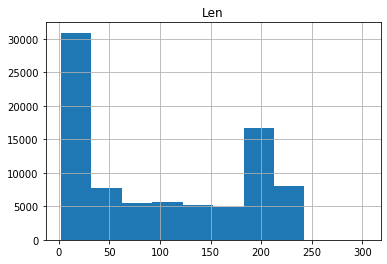

In [9]:
filtered_spam.hist("Len")

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
loaded = np.load("data_banhang.npz")
data_banhang = loaded['a']
data_banhang_labels = [False] * len(data_banhang)

In [20]:
labeled = filtered_spam[filtered_spam["Label"] != '-']

In [21]:
# mentions = np.concatenate((labeled["New Sentence"].to_numpy(), data_banhang))
mentions = labeled["New Sentence"].to_numpy()

In [22]:
mentions.shape

(673,)

In [23]:
# labels = np.concatenate((labeled["Label"].map(lambda x: x == True).to_numpy(), data_banhang_labels))
labels = labeled["Label"].map(lambda x: x == True).to_numpy()

In [24]:
labels.shape

(673,)

In [28]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import joblib

In [29]:
clf = make_pipeline(TfidfVectorizer(), StandardScaler(with_mean=False), svm.SVC())

In [30]:
cv_score = np.mean(cross_val_score(clf, mentions, labels, cv=5, scoring='roc_auc'))

In [31]:
cv_score

0.85110726861167

In [32]:
clf.fit(mentions, labels)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache

In [33]:
clf.score(mentions, labels)

0.9702823179791976

In [34]:
joblib.dump(clf, "svm_nhakhoa.joblib")

['svm_nhakhoa.joblib']

In [ ]:
cls = load(open('svm_nhakhoa.pkl', 'rb'))

In [ ]:
test = filtered_spam[filtered_spam["Label"] == '-']

In [ ]:
x_test = test['New Sentence'].to_numpy()

In [ ]:
y_test = cls.predict(x_test)

In [ ]:
x_test[:10]

In [ ]:
y_test[:10]

In [ ]:
result = pd.DataFrame({'Mention': x_test, 'Predict': y_test})

In [ ]:
result.to_excel('result.xlsx')